In [1]:
from QuantumLib import *
from itertools import product

from tqdm import tqdm
import qutip as q
from scipy.special import comb

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

from numpy.random import normal
from numpy.linalg import norm
from numpy import exp,sqrt
import numpy as np

%matplotlib inline


In [2]:
ray.init()

2020-05-01 10:44:08,478	INFO resource_spec.py:204 -- Starting Ray with 8.94 GiB memory available for workers and up to 4.48 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-05-01 10:44:08,915	INFO services.py:1146 -- View the Ray dashboard at localhost:8265


{'node_ip_address': '192.168.1.97',
 'redis_address': '192.168.1.97:64399',
 'object_store_address': '/tmp/ray/session_2020-05-01_10-44-08_477416_21189/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-05-01_10-44-08_477416_21189/sockets/raylet',
 'webui_url': 'localhost:8265',
 'session_dir': '/tmp/ray/session_2020-05-01_10-44-08_477416_21189'}

## Testing equilibration of spin system to theoretical bound
### Defining system


In [4]:
n= 12
initial_state = tensor([basis(2,0)]*n)
#number of spins

beta0 = lambda n,m: 0
beta1 = lambda n,i: [0,0,1][i]

In [12]:
#spin ring
alpha1 = Heisenberg1dRingGen(-1,0.5,0.1,n)
H1 = hamiltonian(alpha1,beta0, n)
H1=H1/H1.norm()
assert(H1.isherm)

In [6]:
#spin ring with external field
alpha1 = Heisenberg1dRingGen(-1,0.5,0.1,n)
H1i = hamiltonian(alpha1,beta1, n)
H1i = H1i/H1i.norm()
assert(H1i.isherm)

In [5]:
#spin ring with added random pertubation
alpha1 = Heisenberg1dRingGen(-1,0.5,0.1,n)
H1p = hamiltonian(alpha1,beta0, n) 

perturbation: Qobj = random_herm_oper(H1p.dims,n)
perturbation = perturbation/perturbation.norm()
epsilon = 0.1

H1p = H1p/H1p.norm()

H1p=H1p+epsilon*perturbation
H1p = H1p/H1p.norm()
assert(H1p.isherm)

In [15]:
#random hamiltonian
H2 = random_herm_oper(H1ir.dims,n)
H2= H2/H2.norm()
assert(H2.isherm)

In [8]:
#spin chain
alpha3 = Heisenberg1dChainGen(-1,0.5,0.1,n)
H3 = hamiltonian(alpha3,beta0, n)
H3 = H3/H3.norm()
assert(H3.isherm)

### Simulating

In [13]:
final_t = 1e6
steps = 300

energys,states = H1.eigenstates()

times,trace_distances, bound_loose, bound_tight = equilibration_analyser_p(energys,states,initial_state,final_t,steps)

Effective dimension of system: 27.716207358672897


0.18994728880683662
0.10361643884725248


<Figure size 432x288 with 0 Axes>

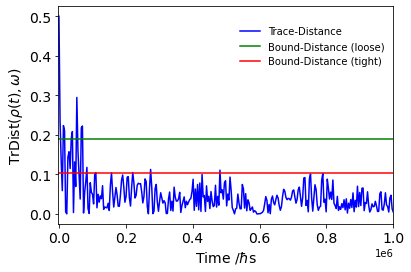

In [14]:
bound_line_loose = [bound_loose]*steps
bound_line_tight = [bound_tight]*steps

print(bound_loose)
print(bound_tight)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax.plot(times, trace_distances, label="Trace-Distance",c='b')
ax.plot(times, bound_line_loose, label="Bound-Distance (loose)",c="g")
ax.plot(times, bound_line_tight, label="Bound-Distance (tight)",c="r")


ax.set_xlabel(r"Time /$\hbar$s",fontsize=14)
ax.set_ylabel(r"TrDist($\rho(t),\omega$)",fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlim([-1500,final_t])
plt.legend(frameon=False, loc="upper right", bbox_to_anchor=(1, 0.95))

plt.savefig("H1EQ12S",dpi=400)
plt.show()

In [8]:
final_t = 1e6
steps = 300


energys,states = H1i.eigenstates()

times,trace_distances, bound_loose, bound_tight = equilibration_analyser_p(energys,states,initial_state,final_t,steps)

Effective dimension of system: 6.314070009211337


0.3979653893131373
0.23638643848245308


<Figure size 432x288 with 0 Axes>

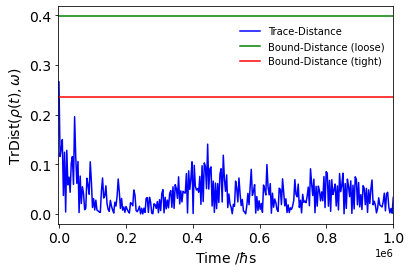

In [9]:
bound_line_loose = [bound_loose]*steps
bound_line_tight = [bound_tight]*steps

print(bound_loose)
print(bound_tight)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax.plot(times, trace_distances, label="Trace-Distance",c='b')
ax.plot(times, bound_line_loose, label="Bound-Distance (loose)",c="g")
ax.plot(times, bound_line_tight, label="Bound-Distance (tight)",c="r")


ax.set_xlabel(r"Time /$\hbar$s",fontsize=14)
ax.set_ylabel(r"TrDist($\rho(t),\omega$)",fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlim([-1500,final_t])
plt.legend(frameon=False, loc="upper right", bbox_to_anchor=(1, 0.95))

plt.savefig("H2EQ12S",dpi=400)
plt.show()

In [6]:
final_t = 1e6
steps = 300


energys,states = H1p.eigenstates()

times,trace_distances, bound_loose, bound_tight = equilibration_analyser_p(energys,states,initial_state,final_t,steps)

Effective dimension of system: 161.77830993090066


0.0786212334455915
0.0428688472269016


<Figure size 432x288 with 0 Axes>

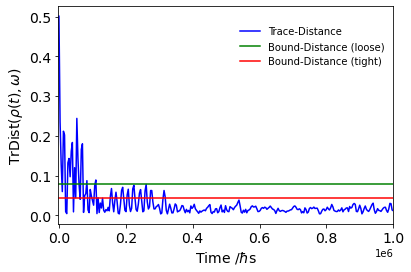

In [7]:
bound_line_loose = [bound_loose]*steps
bound_line_tight = [bound_tight]*steps

print(bound_loose)
print(bound_tight)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax.plot(times, trace_distances, label="Trace-Distance",c='b')
ax.plot(times, bound_line_loose, label="Bound-Distance (loose)",c="g")
ax.plot(times, bound_line_tight, label="Bound-Distance (tight)",c="r")


ax.set_xlabel(r"Time /$\hbar$s",fontsize=14)
ax.set_ylabel(r"TrDist($\rho(t),\omega$)",fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlim([-1500,final_t])
plt.legend(frameon=False, loc="upper right", bbox_to_anchor=(1, 0.95))

plt.savefig("H3EQ12S",dpi=400)
plt.show()

In [16]:
final_t = 1e6
steps = 300


energys,states = H2.eigenstates()

times,trace_distances, bound_loose, bound_tight = equilibration_analyser_p(energys,states,initial_state,final_t,steps)

Effective dimension of system: 2059.7277052776776


0.022034088763990677
0.017449461283458787


<Figure size 432x288 with 0 Axes>

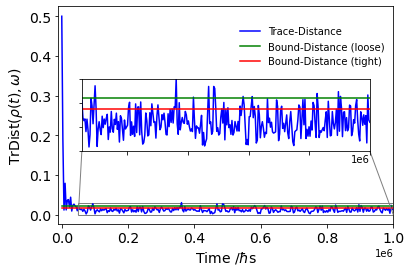

In [26]:
bound_line_loose = [bound_loose]*steps
bound_line_tight = [bound_tight]*steps

print(bound_loose)
print(bound_tight)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax.plot(times, trace_distances, label="Trace-Distance",c='b')
ax.plot(times, bound_line_loose, label="Bound-Distance (loose)",c="g")
ax.plot(times, bound_line_tight, label="Bound-Distance (tight)",c="r")
plt.legend(frameon=False, loc="upper right", bbox_to_anchor=(1, 0.95))

ax_insert = inset_axes(ax, 4,1 , loc="center")
ax_insert.plot(times,trace_distances,c="blue")
ax_insert.plot(times,bound_line_loose,c="g")
ax_insert.plot(times,bound_line_tight,c="r")
x1, x2, y1, y2 = 0.05e6, 1e6, 0, 0.03 # specify the limits
ax_insert.set_xlim(x1, x2) # apply the x-limits
ax_insert.set_ylim(y1, y2) # apply the y-limits
mark_inset(ax, ax_insert, loc1=3, loc2=4, fc="none", ec="0.5")
plt.yticks(visible=False)
plt.xticks(visible=False)

ax.set_xlabel(r"Time /$\hbar$s",fontsize=14)
ax.set_ylabel(r"TrDist($\rho(t),\omega$)",fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlim([-10000,final_t])


plt.savefig("H4EQ12S",dpi=400)
plt.show()

In [ ]:
final_t = 1e6
steps = 300

energys,states = H3.eigenstates()

equilibration_analyser_p(energys,states,initial_state,final_t,steps)

## Testing Trace distance vs energy distance for eigenstates of a hamiltonian

In [29]:
n = 8
processors =4
state1 = tensor([basis(2,0)]*n)

alpha1 = Heisenberg1dRingGen(-1,0.5,0.1,n)
alpha0 = lambda n,m,i,j: 0
beta1 = lambda n,i : [0,0,1][i]
beta0 = lambda n,i :0

self_interaction = hamiltonian(alpha1,beta0,n)
self_interaction = self_interaction/self_interaction.norm()
external_interaction = hamiltonian(alpha0,beta1,n)
external_interaction = external_interaction/external_interaction.norm()


perturbation: Qobj = random_herm_oper(self_interaction.dims,n)
perturbation = perturbation/perturbation.norm()
epsilon = 0.1

H1 = epsilon*self_interaction + external_interaction + epsilon**2*perturbation
H2 = external_interaction + epsilon*perturbation
H3 = external_interaction
H4 = self_interaction + epsilon*external_interaction + epsilon**2*perturbation

#### Examining with no pertubation

In [30]:

xs,ys = energy_trace_compare_p(H3,1,proc=processors)


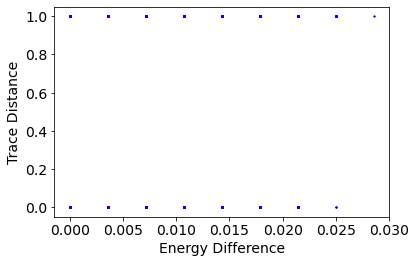

In [31]:
plt.clf()
plt.scatter(xs,ys,s=1, c="b")
plt.xlabel("Energy Difference" ,fontsize=14)
plt.ylabel("Trace Distance",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig("H3EnVTr8S",dpi=400)
plt.show()


#### Examining with pertubation

In [38]:

xs,ys = energy_trace_compare_p(H2,1,proc=processors)


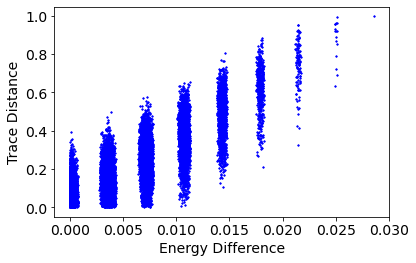

In [39]:
plt.clf()
plt.scatter(xs,ys,s=1, c="b")
plt.xlabel("Energy Difference" ,fontsize=14)
plt.ylabel("Trace Distance",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig("H2EnVTr8S",dpi=400)
plt.show()

#### Examining with pertubation and interaction terms


In [34]:
xs,ys = energy_trace_compare_p(H1,1,proc=processors)

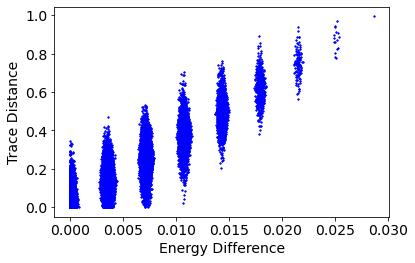

In [35]:
plt.clf()
plt.scatter(xs,ys,s=1, c="b")
plt.xlabel("Energy Difference" ,fontsize=14)
plt.ylabel("Trace Distance",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig("H1EnVTr8S",dpi=400)
plt.show()

#### Examining mainly interaction with external field and random pertubation

In [36]:
xs,ys = energy_trace_compare_p(H4,1,proc=processors)

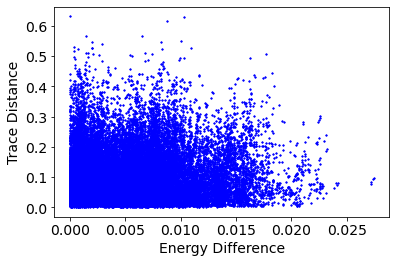

In [37]:
plt.clf()
plt.scatter(xs,ys,s=1, c="b")
plt.xlabel("Energy Difference" ,fontsize=14)
plt.ylabel("Trace Distance",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig("H4EnVTr8S",dpi=400)
plt.show()

## Examining  tracing onto different number of spins  (1,2,3 spins)

In [15]:
xs, ys = energy_trace_compare_p(H1,1,proc=processors)

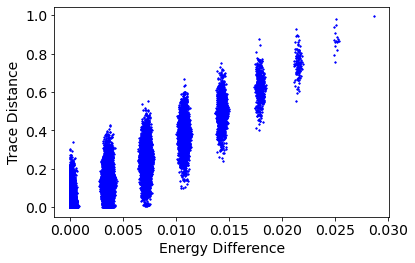

In [16]:
plt.clf()
plt.scatter(xs,ys,s=1, c="b")
plt.xlabel("Energy Difference" ,fontsize=14)
plt.ylabel("Trace Distance",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig("1subEvTr8S",dpi=400)
plt.show()

In [17]:
xs, ys = energy_trace_compare_p(H1,2,proc=processors)

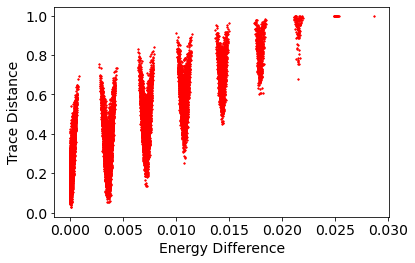

In [18]:
plt.clf()
plt.scatter(xs,ys,s=1, c="r")
plt.xlabel("Energy Difference" ,fontsize=14)
plt.ylabel("Trace Distance",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig("2subEvTr8S",dpi=400)
plt.show()

In [19]:
xs, ys = energy_trace_compare_p(H1,3,proc=processors)

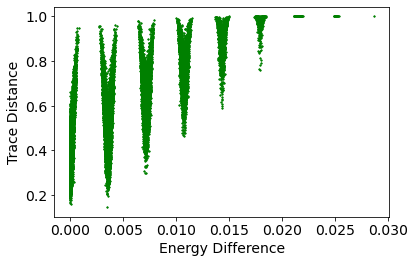

In [20]:
plt.clf()
plt.scatter(xs,ys,s=1, c="g")
plt.xlabel("Energy Difference" ,fontsize=14)
plt.ylabel("Trace Distance",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig("3subEvTr8S",dpi=400)
plt.show()

## Altering Size of System

In [78]:
n = 10 # <-- change this number to generate different plots
processors = 4
state1 = tensor([basis(2,0)]*n)

alpha1 = Heisenberg1dRingGen(-1,0.5,0.1,n)
alpha0 = lambda n,m,i,j: 0
beta1 = lambda n,i : [0,0,1][i]
beta0 = lambda n,i :0

self_interaction = hamiltonian(alpha1,beta0,n)
self_interaction = self_interaction/self_interaction.norm()
external_interaction = hamiltonian(alpha0,beta1,n)
external_interaction = external_interaction/external_interaction.norm()


perturbation: Qobj = random_herm_oper(self_interaction.dims,n)
perturbation = perturbation/perturbation.norm()
epsilon = 0.1

H1 = epsilon*self_interaction + external_interaction + epsilon**2*perturbation

In [79]:
xs, ys = energy_trace_compare_p(H1,1,proc=processors)

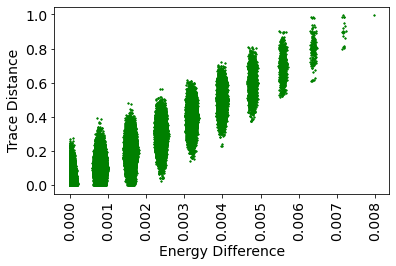

In [84]:
plt.clf()
plt.scatter(xs,ys,s=1, c="g")
plt.xlabel("Energy Difference" ,fontsize=14)
plt.ylabel("Trace Distance",fontsize=14)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.gcf().subplots_adjust(bottom=0.23)
plt.savefig("sys10TrVsE",dpi=400)
plt.show()

### Examining Eigenstates grouping with and without pertubation

In [7]:
n = 10
processsors =4
state1 = tensor([basis(2,0)]*n)

beta1 = lambda n,i : [0,0,1][i]
beta0 = lambda n,i :0
alpha0 = lambda n,m,i,j:0

external_interaction = hamiltonian(alpha0,beta1,n)
external_interaction = external_interaction/external_interaction.norm()


perturbation: Qobj = random_herm_oper(external_interaction.dims,n)
perturbation = perturbation/perturbation.norm()
epsilon = 0.1


H2 = external_interaction
H3 = external_interaction + epsilon*perturbation


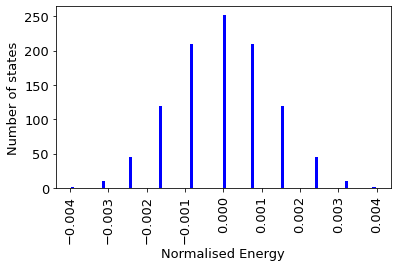

In [8]:
#without
plt.clf()
plt.hist(H2.eigenenergies(),bins=100,color='b')
plt.xlabel("Normalised Energy",fontsize=13)
plt.ylabel("Number of states",fontsize=13)
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=13)
plt.gcf().subplots_adjust(bottom=0.25)
plt.savefig("ZUnPerturbed",dpi=400)
plt.show()

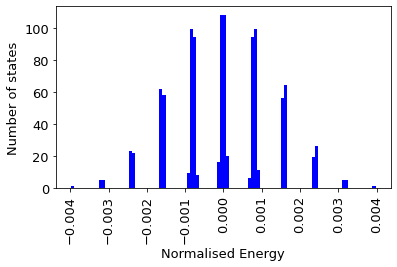

In [9]:
#with
plt.clf()
plt.hist(H3.eigenenergies(),bins=100,color='b')
plt.xlabel("Normalised Energy",fontsize=13)
plt.ylabel("Number of states",fontsize=13)
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=13)
plt.gcf().subplots_adjust(bottom=0.25)
plt.savefig("ZPerturbed",dpi=400)
plt.show()

## Plotting analytical vs experiemntal average trace distacne against n

In [8]:
#Exact value of distance without bounding

def bound_func(nb,ns,n0):
    n = nb+ns
    d = comb(n,n0)
    beta = 2/(d**2-1)
    alpha = beta * -1/(d)
    lhsum = sum(comb(nb,n0-x)**2*comb(ns,x) for x in range(min(ns,n0)+1))
    rhsum  = sum(comb(nb,n0-x)*comb(ns,x)**2 for x in range(min(ns,n0)+1))
    return sqrt((2**ns)/4)*sqrt(alpha*lhsum+ beta*rhsum) 


def approx_bound(nb,ns,n0):
    n = nb+ns
    d = comb(n,n0)
    ds = 2**ns
    return sqrt((d*(ds**2))/(2*(d**2-1)))
    

In [9]:
bounds =[[-0.05,0.05,2],[-0.025,0,2],[-0.01,0.01,3],[-0.01,0,3],[-0.0025,0.0025,4],[-0.002,0,4],[-0.0005,0.0005,5],[-0.0004,0,5],[-0.0001,0.0001,6]]

experimental = []

analytical =[]

approx =[]

for ind, bound in enumerate(bounds):
    n = 4+ind
    alpha0 = lambda n,m,i,j: 0
    beta1 = lambda n,i : [0,0,1][i]
    external_interaction = hamiltonian(alpha0,beta1,n)
    external_interaction = external_interaction/external_interaction.norm()
    perturbation: Qobj = random_herm_oper(external_interaction.dims,n)
    perturbation = perturbation/perturbation.norm()
    epsilon = 0.1
    H3 = external_interaction + epsilon*perturbation
    energies,states = H3.eigenstates()
    energy_state = zip(energies,states)
    energy_state = list(energy_state)
    zero_energy_states = list(filter(lambda val: bound[0]<val[0]<bound[1] ,energy_state))
    print(len(zero_energy_states))
    difference = 0
    count = 0


    for state1,state2 in tqdm(product(zero_energy_states,zero_energy_states)):
        if state1!=state2:
            difference+=tracedist(state1[1].ptrace(0),state2[1].ptrace(0))
            count+=1
    
    experimental.append(difference/count)
    analytical.append(bound_func(n-1,1,bound[2]))
    approx.append(approx_bound(n-1,1,bound[2]))

36it [00:00, 1101.41it/s]
0it [00:00, ?it/s]

6
10


100it [00:00, 1024.95it/s]
98it [00:00, 974.18it/s]

20


400it [00:00, 977.84it/s]
96it [00:00, 953.54it/s]

35


1225it [00:01, 957.99it/s]
94it [00:00, 932.32it/s]

70


4900it [00:05, 943.90it/s]
92it [00:00, 914.39it/s]

126


15876it [00:16, 939.86it/s]
92it [00:00, 913.30it/s]

252


63504it [01:08, 924.06it/s]
90it [00:00, 894.37it/s]

462


213444it [03:54, 911.31it/s]
88it [00:00, 879.95it/s]

924


853776it [15:57, 891.36it/s]


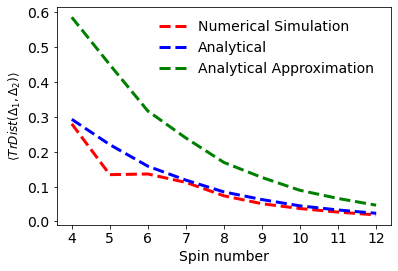

In [25]:
plt.plot(range(4,13),experimental,"r--", label = "Numerical Simulation", linewidth =3)
plt.plot(range(4,13),analytical ,"b--", label = "Analytical", linewidth =3)
plt.plot(range(4,13),approx, "g--",label = "Analytical Approximation ", linewidth =3)
plt.legend(frameon=False,fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Spin number",fontsize=14)
plt.ylabel(r"$\langle TrDist(\Delta_1,\Delta_2) \rangle$",fontsize=12)
plt.savefig("TrVsSpinRedUnitGroup",dpi=400)
plt.show()


## Plotting Energy level diagram

In [49]:
n = 8
state1 = tensor([basis(2,0)]*n)

alpha1 = Heisenberg1dRingGen(-1,0.5,0.1,n)
alpha0 = lambda n,m,i,j: 0
beta1 = lambda n,i : [0,0,1][i]
beta0 = lambda n,i :0

self_interaction = hamiltonian(alpha1,beta0,n)
self_interaction = self_interaction/self_interaction.norm()
external_interaction = hamiltonian(alpha0,beta1,n)
H2u = external_interaction
external_interaction = external_interaction/external_interaction.norm()


perturbation: Qobj = random_herm_oper(self_interaction.dims,n)
perturbation = perturbation/perturbation.norm()
I_epsilon = 0.1
P_epsilon = 0.1

H1 = I_epsilon*self_interaction + external_interaction + P_epsilon**2*perturbation
H2 = external_interaction
H3 = external_interaction + P_epsilon*perturbation
H4 = external_interaction + I_epsilon*self_interaction



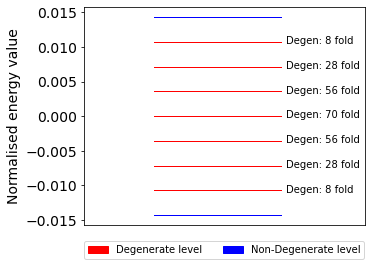

In [50]:
energy_band_plot(H2, "", "EplotE")

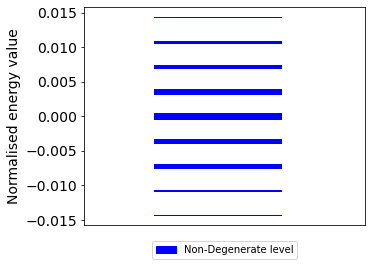

In [51]:
energy_band_plot(H3, "",  "EplotEP")

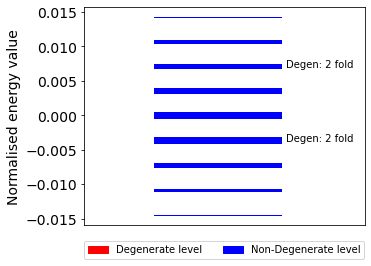

In [52]:
energy_band_plot(H4, "", "EplotI")

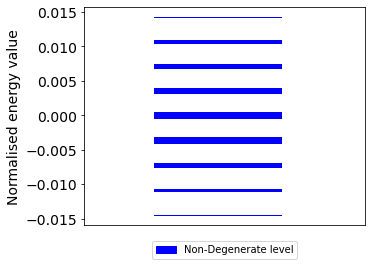

In [53]:
energy_band_plot(H1, "", "EplotIP")

## Thermal Bound Graph

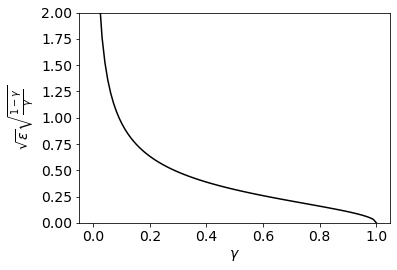

In [74]:
x = np.linspace(0.001,1,100)

y = np.sqrt(0.1)*np.sqrt((1-x)/x)

plt.plot(x,y,c="black")
plt.ylim([0,2])
plt.xlabel(r"$\gamma$",fontsize=14)
plt.ylabel(r"$\sqrt{\epsilon}\sqrt{\frac{1-\gamma}{\gamma}}$",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gcf().subplots_adjust(bottom=0.15,left=0.18)
plt.savefig("eth_bound_plot",dpi=400)
plt.show()